### Generating a training set
- The goal of this notebook is to generate a training set for a ML algorithm.
- The first approach will be simple.
    - Using the DQ as the label, train up a binary classifier to find cosmic rays

In [104]:
%matplotlib notebook
from astropy.io import fits
import pandas as pd
import numpy as np
import os
import glob
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from astropy.visualization import SqrtStretch
from astropy.visualization import LogStretch, LinearStretch, ZScaleInterval
from astropy.visualization.mpl_normalize import ImageNormalize
from sklearn.preprocessing import StandardScaler
from scipy import ndimage
import sys
import skimage.segmentation as segment
from photutils.utils import random_cmap
plt.style.use('ggplot')

In [2]:
sys.path.append('/Users/nmiles/hst_cosmic_rays/lib/')
from CosmicRayLabel import CosmicRayLabel
from ComputeStats import ComputeStats

In [3]:
fname = './../data/jd4wemc8q_flt.fits'

In [86]:
c = CosmicRayLabel(fname)

In [87]:
c.generate_label()

A total of 66392 objects were identified
After thresholding there are 46702 objects


In [6]:
with fits.open(fname) as hdu:
    sci2 = hdu[1].data
    sci1 = hdu[4].data
sci = np.concatenate([sci2, sci1])

In [7]:
sci

array([[  1.68921394e+01,   8.27266693e-01,  -2.17002869e+00, ...,
          2.26264687e+01,   2.42290688e+01,   3.79767418e+01],
       [ -1.22100086e+01,   1.72226295e+01,   2.77003288e+01, ...,
          5.20277023e+00,   2.69051094e+01,   4.09615059e+01],
       [  2.80224113e+01,   1.56538162e+01,   1.19122238e+01, ...,
          3.54828644e+01,   9.39651871e+00,   2.50069695e+01],
       ..., 
       [  2.00637817e+00,   6.81108551e+01,  -1.64466476e+00, ...,
          1.54324989e+01,   3.90083008e+01,   1.10054626e+02],
       [  3.01920254e+04,   4.84163933e+01,   7.79243469e-01, ...,
          2.69767914e+01,   7.79936523e+01,   9.95363647e+02],
       [  1.94526024e+01,   9.00345612e+00,   1.79947395e+01, ...,
          1.90740662e+01,   3.50224876e+01,   7.26137085e+01]], dtype=float32)

In [8]:
stats = ComputeStats(fname,c.label)

In [9]:
sizes = stats.compute_size()

/Users/nmiles/hst_cosmic_rays/lib/ComputeStats.py:235: RuntimeWarning: invalid value encountered in sqrt
  sizes[int_id] = np.sqrt(second_moment.sum() / 2)


Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edge!!!!!!!!!!!!
Cosmic ray struck the edg

In [10]:
sizes

{1: 0.47213735447305671,
 2: 0.68005119117939017,
 3: 0.39742269458814605,
 4: 1.589223170795117,
 5: 0.48615831195534148,
 6: 0.40587809623781052,
 7: 0.35315349899135812,
 8: 0.42985750639476322,
 9: 0.40032481657966101,
 10: 0.4935179294708924,
 11: 0.5421122522785089,
 12: 0.43951975886080058,
 13: 0.46129183797242013,
 14: 0.49248331558928771,
 15: 0.41730453959613062,
 16: 0.61850573041052537,
 17: 0.61311798284399432,
 18: 0.33100038318502978,
 19: 2.9548700733879434,
 20: 0.55491702993170378,
 21: 0.71086884471741085,
 22: 0.50622515662584444,
 23: 0.4432761157034491,
 24: 0.42276242367995787,
 25: 0.48271944242389908,
 26: 1.2517705707214237,
 27: 0.53167747524910403,
 28: 0.45249143800550062,
 29: 0.43384600549197877,
 30: 1.1777590541887542,
 31: 0.5566600470465437,
 32: 0.41919534891036386,
 33: 0.29655728651737917,
 34: 0.4083289785127866,
 35: 0.41308574027171935,
 36: 0.52195534312531777,
 37: 0.79061535933441207,
 38: 1.8836569349200218,
 39: 0.41752895133965462,
 40: 0

In [77]:
max_size_idx = np.where(np.asarray(list(sizes.values())) > 15.)

/Users/nmiles/miniconda3/envs/astroconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [78]:
max_size_idx = max_size_idx[0] + 1

In [79]:
idx = max_size_idx[1]

In [80]:
sizes[idx]

16.083865004545842

In [81]:
stats.cr_locs[idx-1]

(slice(2131, 2204, None), slice(19, 61, None))

In [82]:
box_data = sci[stats.cr_locs[idx-1]]

In [83]:
box_data.shape

(73, 42)

In [101]:
coords = np.where(box_data < -10)
coords = list(zip(coords[0], coords[1]))

In [90]:
box_data_dq = c.dq[stats.cr_locs[idx-1]]

In [102]:
def mk_patch(r, c='red'):
    CR_center = patches.Rectangle((r[1]-0.5,r[0]-0.5), 
                              width=1, height=1, 
                              alpha=1.0, fill=False,
                              linewidth=1.75, color=c)
    return CR_center

<IPython.core.display.Javascript object>


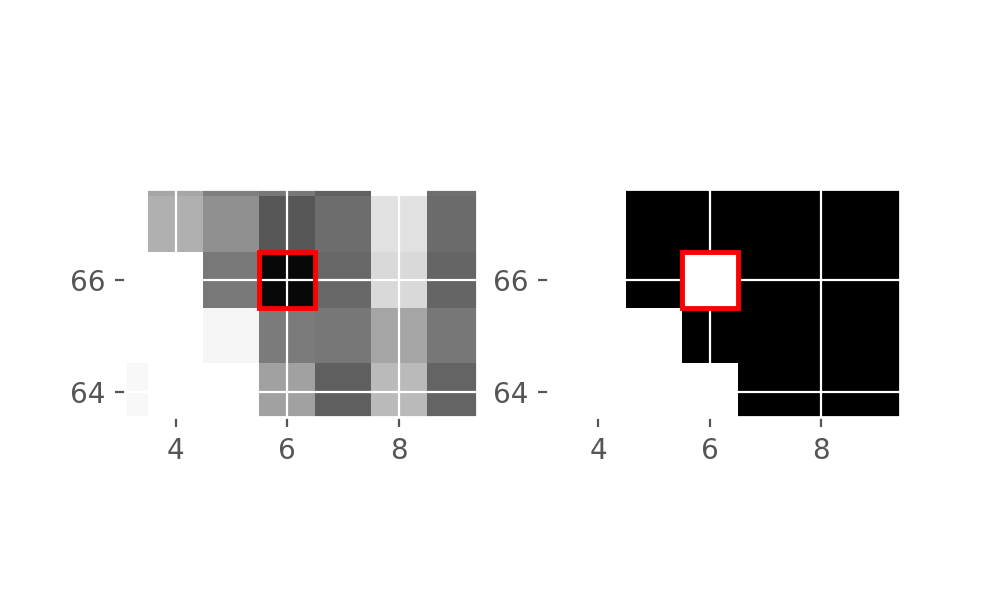

In [108]:
norm = ImageNormalize(sci, stretch=LogStretch(a=5.), interval=ZScaleInterval())
fig = plt.figure(figsize=(5,3))
ax1 = fig.add_subplot(1,2,1)
ax2 =  fig.add_subplot(1,2,2,sharex=ax1, sharey=ax1)
ax1.imshow(box_data, cmap='gray', origin='lower', norm=norm)
ax2.imshow(box_data_dq, cmap='bone', interpolation='nearest', origin='lower')
for coord in coords:
    patch1 = mk_patch(coord)
    patch2 = mk_patch(coord)
    ax1.add_patch(patch1)
    ax2.add_patch(patch2)

In [99]:
np.where(box_data < -10)

(array([ 0,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  5,  6,  7, 10, 11, 11,
        11, 11, 14, 14, 15, 15, 15, 15, 16, 16, 18, 18, 19, 19, 19, 20, 21,
        22, 23, 23, 23, 23, 25, 26, 26, 27, 27, 27, 30, 30, 32, 32, 36, 38,
        39, 40, 41, 42, 42, 44, 46, 46, 47, 48, 49, 49, 49, 51, 51, 51, 52,
        52, 54, 54, 54, 55, 55, 58, 60, 60, 61, 62, 62, 62, 63, 63, 63, 64,
        66, 66, 66, 67, 67, 68, 71, 72]),
 array([11, 30,  6, 11, 12, 13, 10, 14, 17, 24, 14,  0, 11, 14,  8,  1, 11,
        13, 20,  1, 22,  0,  6, 36, 41, 37, 41, 13, 17,  9, 17, 34,  1, 13,
        15,  1,  9, 16, 41, 29,  6,  9,  0, 34, 40,  8, 10,  7, 37, 40,  8,
        35, 39, 37, 28, 41, 33, 27, 36, 31, 20, 22, 33, 36, 19, 37, 40, 17,
        29, 16, 21, 40, 20, 24, 36, 13, 28, 40, 13, 22, 41, 22, 29, 36, 10,
         6, 10, 28, 15, 37, 37, 40, 14]))

In [92]:
num_pix = len(box_data.flatten())

In [93]:
data = {'sci':box_data.flatten(),'dq':box_data_dq.flatten(),'pix':np.linspace(1, num_pix, num_pix)} 

In [94]:
data

{'sci': array([ -8.00136948,  -7.41472244,  10.79026794, ...,  27.67761993,
          2.19869995,  10.02416611], dtype=float32),
 'dq': array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 'pix': array([  1.00000000e+00,   2.00000000e+00,   3.00000000e+00, ...,
          3.06400000e+03,   3.06500000e+03,   3.06600000e+03])}

In [95]:
print(len(data['sci']), len(data['dq']), len(data['pix']))

3066 3066 3066


In [96]:
df = pd.DataFrame(data)

<IPython.core.display.Javascript object>


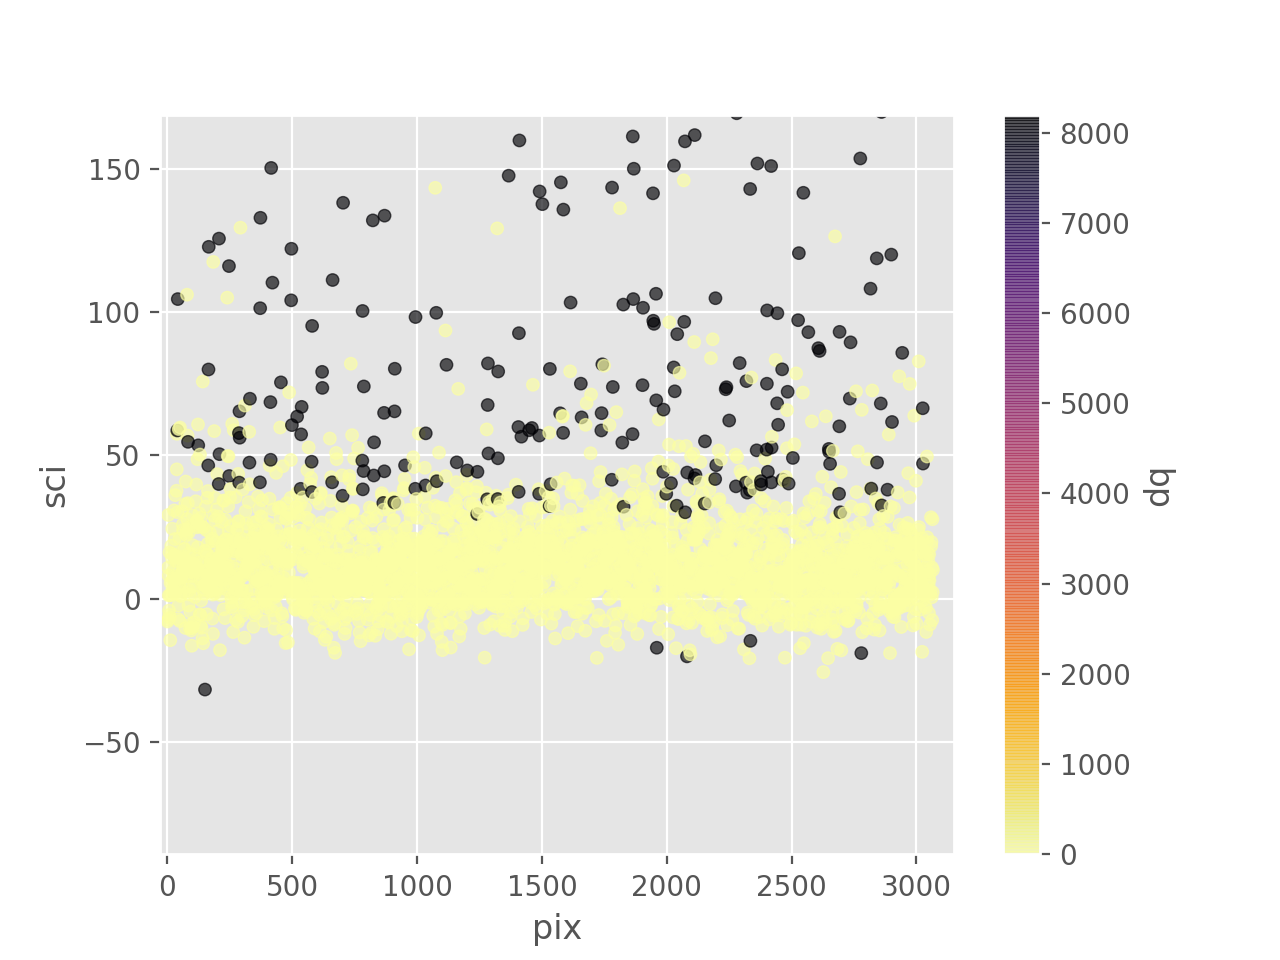

In [97]:
df.plot(kind='scatter',x='pix',y='sci',c='dq',colormap=plt.get_cmap('inferno_r'), alpha=0.65)

In [88]:
d = [[1,2,3,4,5],[6,7,8,9,10]]
d = np.asarray(d)

In [89]:
d.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Generate a multipage pdf of cutouts for cosmic rays to show what cosmic rays of different sizes look like

In [27]:
avg_size = np.nanmean(list(sizes.values()))
std_size = np.nanstd(list(sizes.values()))

In [28]:
avg_size, std_size

(0.62570046169718752, 0.50553095073799503)

In [29]:
max_size_idx = np.where(np.asarray(list(sizes.values())) > 5.)

/Users/nmiles/miniconda3/envs/astroconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
